In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
samples = pd.read_excel('data.xlsx',index_col='姓名')

In [12]:
samples

,身高,体重,标签
姓名,,,
1,170,170,胖
2,180,140,瘦
3,160,130,胖
4,175,171,胖
5,155,120,胖
6,160,89,瘦
7,170,93,瘦
8,173,90,瘦


In [17]:
# 这是一个未知身材的数据
X_test = np.array([[160,170]])

In [18]:
X_test[0,0]

160

姓名
1    1
2    0
3    1
4    1
5    1
6    0
7    0
8    0
Name: 标签, dtype: int64

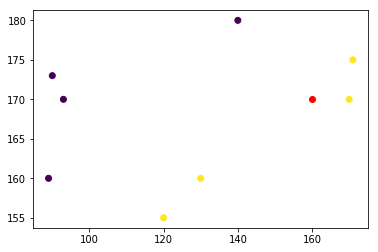

In [19]:
train = samples[['身高','体重']]
target = samples['标签']

# 把胖转换成数字1,瘦转换成数字0
def trans_label(x):
    if x == '胖':
        return 1
    else:
        return 0

target = target.map(trans_label)
# 把数据特征映射到一个坐标系中，这个坐标系称之为【特征空间】
# 左上角属于偏瘦，右下角属于偏旁
plt.scatter(train['体重'],train['身高'],c=target)
plt.scatter(X_test[0,0],X_test[0,1],color='red')
display(target)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# 训练Knn模型
knn.fit(train,target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
# 预测X_test的身材
knn.predict(X_test)

array([1], dtype=int64)